In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
import pandas as pd

import utility
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 10})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Consumption-Saving Model with Endogenous Labor Supply


In [2]:
from ConSavModel import ConSavModelClass

model = ConSavModelClass(name='endogenous_labor_supply')

par = model.par
sol = model.sol
sim = model.sim

model.solve(do_print=True,algo='egm')

iteration    0 solved in 3.9 secs   [max abs. diff. 3.13e+00]
iteration    1 solved in 0.0 secs   [max abs. diff. 7.24e-01]
iteration    2 solved in 0.0 secs   [max abs. diff. 4.63e-01]
iteration    3 solved in 0.0 secs   [max abs. diff. 3.30e-01]
iteration    4 solved in 0.0 secs   [max abs. diff. 2.49e-01]
iteration    5 solved in 0.0 secs   [max abs. diff. 1.96e-01]
iteration    6 solved in 0.0 secs   [max abs. diff. 1.59e-01]
iteration    7 solved in 0.0 secs   [max abs. diff. 1.31e-01]
iteration    8 solved in 0.0 secs   [max abs. diff. 1.10e-01]
iteration    9 solved in 0.0 secs   [max abs. diff. 9.31e-02]
iteration  100 solved in 0.0 secs   [max abs. diff. 1.08e-04]
iteration  174 solved in 0.0 secs   [max abs. diff. 9.66e-09]
model solved in 4.4 secs


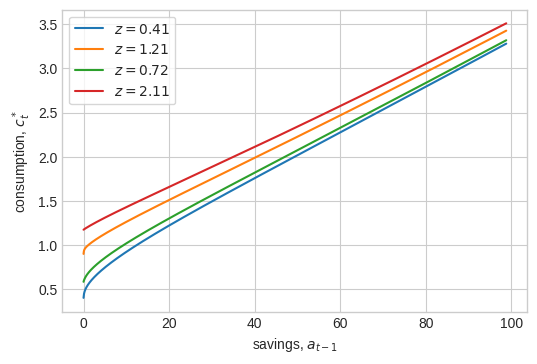

In [3]:
fig = plt.figure(figsize=(6,4),dpi=100)

I = par.a_grid < 100

# Consumption
ax = fig.add_subplot(1,1,1)
# ax.set_title(f'Consumption')

for i_z, z in enumerate(par.z_grid):
    if i_z % 3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I], sol.c[i_z, :][I], label=f'$z={z:.2f}$')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t^*$')
ax.legend(frameon=True)

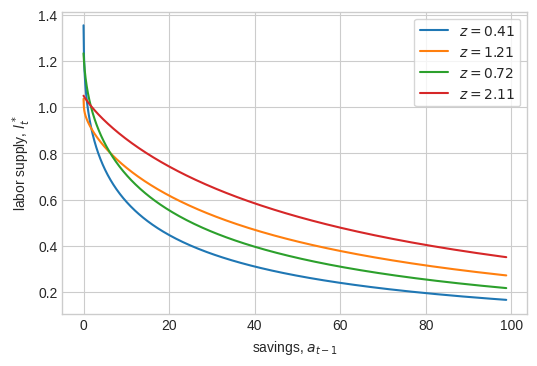

In [4]:
# Labor Supply
fig = plt.figure(figsize=(6,4),dpi=100)

I = par.a_grid < 100

ax = fig.add_subplot(1,1,1)
# ax.set_title(f'Labor Supply')

for i_z, z in enumerate(par.z_grid):
    if i_z % 3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I], sol.l[i_z, :][I],label=f'$z={z:.2f}$')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $l_t^*$')
ax.legend(frameon=True)

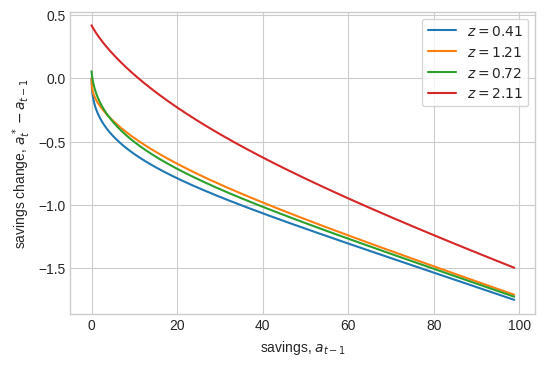

In [5]:
# Savings
fig = plt.figure(figsize=(6,4),dpi=100)

I = par.a_grid < 100
ax = fig.add_subplot(1,1,1)
# ax.set_title(f'Savings')

for i_z, z in enumerate(par.z_grid):
    if i_z % 3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I], sol.a[i_z, :][I]-par.a_grid[I],label=f'$z={z:.2f}$')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings change, $a_t^* - a_{t-1}$')
ax.legend(frameon=True)


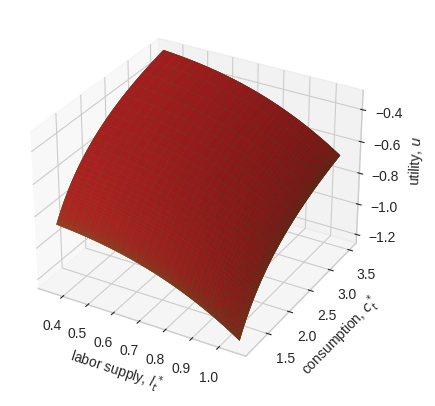

In [6]:
fig = plt.figure(figsize=(14,4),dpi=100)

ax = fig.add_subplot(1,1,1,projection='3d')
# ax.set_title(f'Utility')

# Prepare 3D arrays for consumption, labor supply, and utility
C, L = np.meshgrid(sol.c[i_z,:][I], sol.l[i_z,:][I])
U = utility.func_2(C, L, par)

for i_z, z in enumerate(par.z_grid):
    if i_z % 3 == 0 or i_z == par.Nz-1:
        # Draw 3D surface plot
        ax.plot_surface(L, C, U, label=f'$z={z:.2f}$')

ax.set_xlabel('labor supply, $l_t^*$')
ax.set_ylabel('consumption, $c_t^*$')
ax.set_zlabel('utility, $u$')

fig.tight_layout()
plt.show()

In [7]:
model_exo = ConSavModelClass(name='exogenous_labor_supply')

sol_exo = model_exo.sol
sim_exo = model_exo.sim

model_exo.solve(do_print=True,algo='egm_exo')

iteration    0 solved in 3.4 secs   [max abs. diff. 5.01e+01]
iteration    1 solved in 0.0 secs   [max abs. diff. 1.67e+01]
iteration    2 solved in 0.0 secs   [max abs. diff. 8.35e+00]
iteration    3 solved in 0.0 secs   [max abs. diff. 5.01e+00]
iteration    4 solved in 0.0 secs   [max abs. diff. 3.34e+00]
iteration    5 solved in 0.0 secs   [max abs. diff. 2.39e+00]
iteration    6 solved in 0.0 secs   [max abs. diff. 1.79e+00]
iteration    7 solved in 0.0 secs   [max abs. diff. 1.39e+00]
iteration    8 solved in 0.0 secs   [max abs. diff. 1.11e+00]
iteration    9 solved in 0.0 secs   [max abs. diff. 9.10e-01]
iteration  100 solved in 0.0 secs   [max abs. diff. 3.26e-03]
iteration  200 solved in 0.0 secs   [max abs. diff. 5.79e-07]
iteration  242 solved in 0.0 secs   [max abs. diff. 9.85e-09]
model solved in 3.5 secs


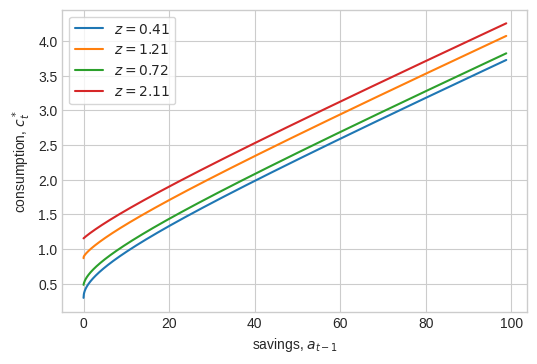

In [8]:
fig = plt.figure(figsize=(6,4),dpi=100)

I = par.a_grid < 100

# a. consumption
ax = fig.add_subplot(1,1,1)
# ax.set_title(f'Consumption')

for i_z, z in enumerate(par.z_grid):
    if i_z % 3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I], sol_exo.c[i_z, :][I], label=f'$z={z:.2f}$')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t^*$')
ax.legend(frameon=True)

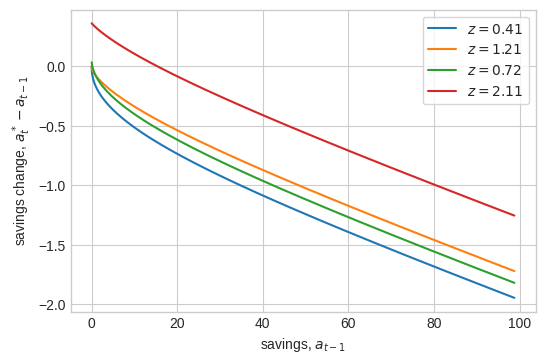

In [9]:
# Savings
fig = plt.figure(figsize=(6,4),dpi=100)

ax = fig.add_subplot(1,1,1)
# ax.set_title(f'Savings')

for i_z, z in enumerate(par.z_grid):
    if i_z % 3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I], sol_exo.a[i_z, :][I]-par.a_grid[I],label=f'$z={z:.2f}$')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings change, $a_t^* - a_{t-1}$')
ax.legend(frameon=True)

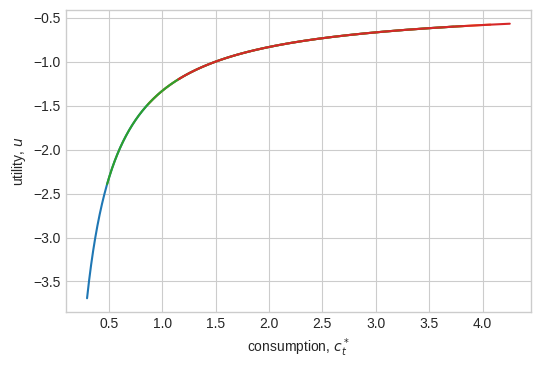

In [10]:
# Utility
fig = plt.figure(figsize=(6,4),dpi=100)

ax = fig.add_subplot(1,1,1)
# ax.set_title(f'Utility')

for i_z, z in enumerate(par.z_grid):
    if i_z % 3 == 0 or i_z == par.Nz:
        ax.plot(sol_exo.c[i_z,:][I], sol_exo.u[i_z,:][I],label=f'$z={z:.2f}$')

ax.set_xlabel('consumption, $c_t^*$')
ax.set_ylabel('utility, $u$')

plt.show()

In [11]:
# model solution for different values of par.tau
tau_vec = [0.0,0.05,0.1,0.15,0.2,0.25,0.3]

U_endo = np.zeros(len(tau_vec))
L_endo = np.zeros(len(tau_vec))
C_endo = np.zeros(len(tau_vec))
A_endo = np.zeros(len(tau_vec))

for i, tau in enumerate(tau_vec):
    model_tau = ConSavModelClass(name='range',par={'tau':tau})
    model_tau.solve(do_print=False,algo='egm')
    L_endo[i] = np.mean(model_tau.sol.l)
    U_endo[i] = np.mean(model_tau.sol.u)
    C_endo[i] = np.mean(model_tau.sol.c)
    A_endo[i] = np.mean(model_tau.sol.a)

U_exo = np.zeros(len(tau_vec))
L_exo = np.zeros(len(tau_vec))
C_exo = np.zeros(len(tau_vec))
A_exo = np.zeros(len(tau_vec))

for i, tau in enumerate(tau_vec):
    model_tau_exo = ConSavModelClass(name='range',par={'tau':tau})
    model_tau_exo.solve(do_print=False,algo='egm_exo')
    L_exo[i] = np.mean(model_tau_exo.sol.ell)
    U_exo[i] = np.mean(model_tau_exo.sol.u)
    C_exo[i] = np.mean(model_tau_exo.sol.c)
    A_exo[i] = np.mean(model_tau_exo.sol.a)

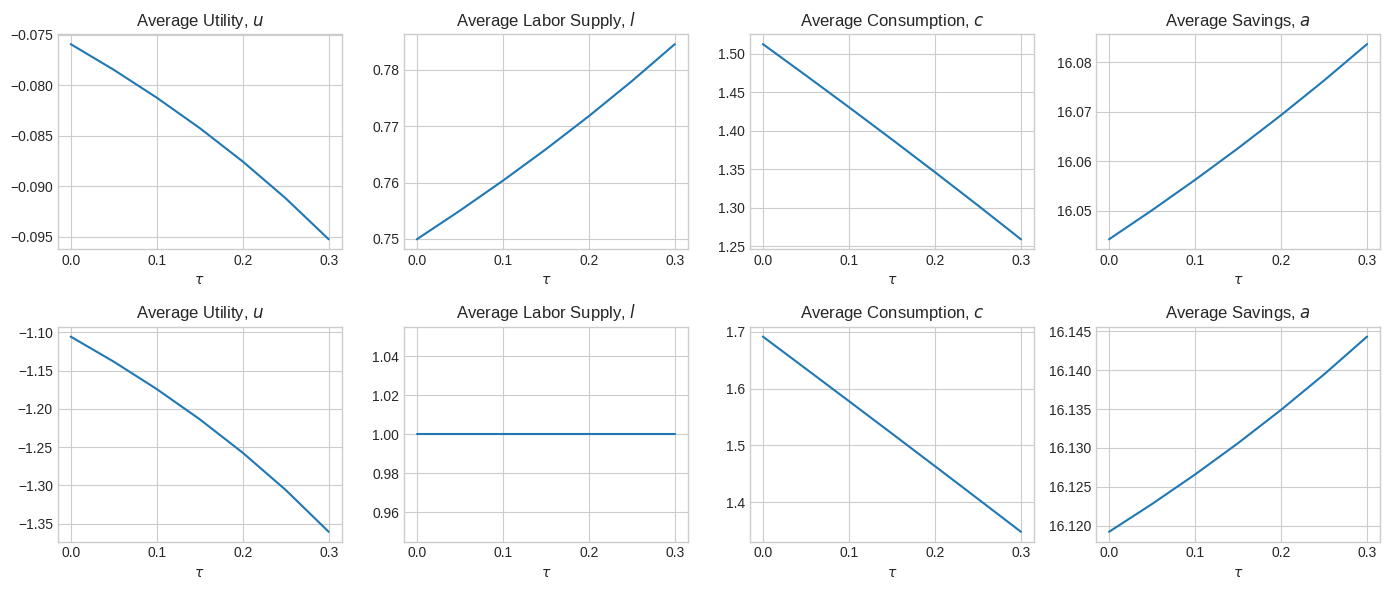

In [12]:
# plot optimal solutions as a function of par.tau
fig = plt.figure(figsize=(14,6), dpi=100) 

ax = fig.add_subplot(2, 4, 1)
ax.set_title('Average Utility, $u$')
ax.plot(tau_vec, U_endo, '-')
ax.set_xlabel('$\\tau$')

ax = fig.add_subplot(2, 4, 2)
ax.set_title('Average Labor Supply, $l$')
ax.plot(tau_vec, L_endo, '-')
ax.set_xlabel('$\\tau$')

ax = fig.add_subplot(2, 4, 3)
ax.set_title('Average Consumption, $c$')
ax.plot(tau_vec, C_endo, '-')
ax.set_xlabel('$\\tau$')

ax = fig.add_subplot(2, 4, 4)
ax.set_title('Average Savings, $a$')
ax.plot(tau_vec, A_endo, '-')
ax.set_xlabel('$\\tau$')

ax = fig.add_subplot(2, 4, 5)
ax.set_title('Average Utility, $u$')
ax.plot(tau_vec, U_exo, '-')
ax.set_xlabel('$\\tau$')

ax = fig.add_subplot(2, 4, 6)
ax.set_title('Average Labor Supply, $l$')
ax.plot(tau_vec, L_exo, '-')
ax.set_xlabel('$\\tau$')

ax = fig.add_subplot(2, 4, 7)
ax.set_title('Average Consumption, $c$')
ax.plot(tau_vec, C_exo, '-')
ax.set_xlabel('$\\tau$')

ax = fig.add_subplot(2, 4, 8)
ax.set_title('Average Savings, $a$')
ax.plot(tau_vec, A_exo, '-')
ax.set_xlabel('$\\tau$')

plt.tight_layout()
plt.show()

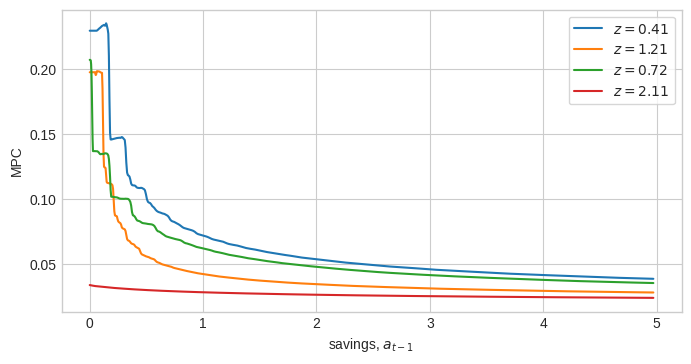

In [13]:
# mpc plot endogenous labor supply
fig = plt.figure(figsize=(8,4),dpi=100)

I = par.a_grid < 5

# a. consumption
ax = fig.add_subplot(1,1,1)
# ax.set_title(f'MPC for endogenous labor supply')

for i_z, z in enumerate(par.z_grid):
    if i_z % 3 == 0 or i_z == par.Nz:
        ax.plot(par.a_grid[I], sol.mpc[i_z,][I], label=f'$z={z:.2f}$')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('MPC')
ax.legend(frameon=True)

plt.show()

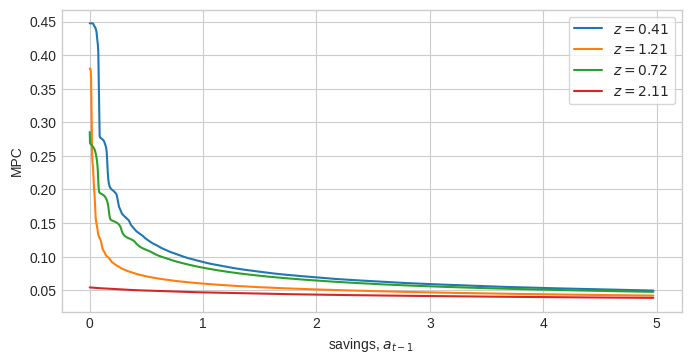

In [14]:
# mpc plot exogenous labor supply
fig = plt.figure(figsize=(8,4),dpi=100)

I = par.a_grid < 5

ax = fig.add_subplot(1,1,1)
# ax.set_title(f'MPC for exogenous labor supply')

for i_z, z in enumerate(par.z_grid):
    if i_z % 3 == 0 or i_z == par.Nz:
        ax.plot(par.a_grid[I], sol_exo.mpc[i_z, :][I], label=f'$z={z:.2f}$')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('MPC')
ax.legend(frameon=True)

plt.show()

In [15]:
# creating MPC table
assets = np.array([0, 1, 2])
z_values = [z for i_z, z in enumerate(par.z_grid) if i_z % 3 == 0 or i_z == par.Nz - 1]
z_indices = [i_z for i_z, z in enumerate(par.z_grid) if i_z % 3 == 0 or i_z == par.Nz - 1]

indices = []
for asset in assets:
    idx = np.argmin(np.abs(par.a_grid - asset))
    indices.append(idx)

# extract the MPCs for the asset levels and each z level
mpc_values_endo = [sol_exo.mpc[i_z, indices] for i_z in z_indices]
mpc_values_exo = [sol.mpc[i_z, indices] for i_z in z_indices]

# create a DataFrame for presentation
df_mpc = pd.DataFrame(mpc_values_endo, columns=assets, index=z_values)
df_mpc_exo = pd.DataFrame(mpc_values_exo, columns=assets, index=z_values)

df_mpc_exo.index.name = df_mpc.index.name = "Productivity (z)"
df_mpc_exo.columns.name = df_mpc.columns.name = "Asset Levels"

print(f'MPC for endogenous labor supply: {df_mpc} \nMPC for exogenous labor supply: {df_mpc_exo}')

MPC for endogenous labor supply: Asset Levels             0         1         2
Productivity (z)                              
0.413654          0.447351  0.091993  0.069043
1.207683          0.379979  0.059890  0.051200
0.722107          0.285505  0.083563  0.064444
2.108225          0.054270  0.046850  0.043526 
MPC for exogenous labor supply: Asset Levels             0         1         2
Productivity (z)                              
0.413654          0.229613  0.072252  0.053929
1.207683          0.197691  0.042606  0.034816
0.722107          0.207229  0.062319  0.048126
2.108225          0.034158  0.028609  0.026729
